## Exploratory analysis on the effects of pandemic on visits to primary care and emergency services 

In this project, I am going to determine if GP attendances have dropped during the pandemic in more deprived areas (CCGs) or areas with greater percentage of over 65-year-olds. The project is aimed to better understand the extent to which there is inequality with regards to which patients have not been referred over the course of the pandemic.

The cancer policy team wants us to focus on answering the following questions:
* Have GP attendances dropped more in more deprived CCGs? 
    * Is there a correlation between GP attendances and deprivation?
* Have GP attendances dropped by age groups over 65?
    * Is there a correlation between GP attendances and age?
* Do we still see those patterns when excluding urgent appointments? 


## Time periods

I’d need to compare GP attendances in below time points, and present them as the proportionate change in [GP appointments](https://files.digital.nhs.uk/BE/2D935F/Appointments_GP_Daily_Jan21.zip) attended between:  
* March 2020 – September 2020  vs. March – September 2019 
* October 2020 -  December 2020 vs. October – December 2019  

## Read in the data

In [1]:
#Read in multiple CSV in 1 dataframe per https://medium.com/@kadek/elegantly-reading-multiple-csvs-into-pandas-e1a76843b688
import glob
import pandas as pd

In [2]:
MarSep2019 = pd.concat([pd.read_csv(f) for f in glob.glob('Daily/Mar-Sep2019/CCG_CSV*.csv')], ignore_index = True)
MarSep2020 = pd.concat([pd.read_csv(f) for f in glob.glob('Daily/Mar-Sep2020/CCG_CSV*.csv')], ignore_index = True)
OctDec2019 = pd.concat([pd.read_csv(f) for f in glob.glob('Daily/Oct-Dec2019/CCG_CSV*.csv')], ignore_index = True)
OctDec2020 = pd.concat([pd.read_csv(f) for f in glob.glob('Daily/Oct-Dec2020/CCG_CSV*.csv')], ignore_index = True)

## Quick exploration of the data

In [3]:
#Check that data is combined correctly
print(len(MarSep2019)) # how many rows? 2.3M so it won't fit Excel if > 1M...

#Quick exploration of the data
pd.options.display.max_columns = 150 # to avoid truncated output 
MarSep2019.head() #show top 5 rows

2288323


,CCG_CODE,CCG_ONS_CODE,CCG_NAME,STP_ONS_CODE,REGION_ONS_CODE,Appointment_Date,APPT_STATUS,HCP_TYPE,APPT_MODE,TIME_BETWEEN_BOOK_AND_APPT,COUNT_OF_APPOINTMENTS
0,00L,E38000130,NHS Northumberland CCG,E54000050,E40000009,01JUN2019,Attended,Other Practice staff,Telephone,2 to 7 Days,1
1,00L,E38000130,NHS Northumberland CCG,E54000050,E40000009,01JUN2019,Attended,GP,Face-to-Face,2 to 7 Days,25
2,00L,E38000130,NHS Northumberland CCG,E54000050,E40000009,01JUN2019,DNA,GP,Face-to-Face,8 to 14 Days,2
3,00L,E38000130,NHS Northumberland CCG,E54000050,E40000009,01JUN2019,Attended,Other Practice staff,Face-to-Face,Same Day,5
4,00L,E38000130,NHS Northumberland CCG,E54000050,E40000009,01JUN2019,Attended,GP,Face-to-Face,Same Day,35


In [4]:
# Check the unique values for the Appointment column & counts
pd.set_option('display.max_rows', None)# Set it to 'None' to display all rows in the dataframe
print(MarSep2019['Appointment_Date'].value_counts()) #does it show me all the months I want Mar to Sep 2019? Yes

28AUG2019    15515
24SEP2019    15466
24APR2019    15383
26SEP2019    15378
25SEP2019    15371
30APR2019    15334
25JUN2019    15332
26MAR2019    15331
29AUG2019    15325
17SEP2019    15321
04SEP2019    15315
03SEP2019    15281
23JUL2019    15276
25APR2019    15267
16JUL2019    15262
30JUL2019    15253
05SEP2019    15240
18SEP2019    15236
10SEP2019    15232
04JUN2019    15215
12MAR2019    15209
08MAY2019    15208
05MAR2019    15204
11JUN2019    15186
27MAR2019    15175
13AUG2019    15166
18JUN2019    15159
20AUG2019    15156
24JUL2019    15153
19MAR2019    15148
02JUL2019    15145
19SEP2019    15140
12SEP2019    15134
29MAY2019    15127
21MAY2019    15126
11SEP2019    15118
01MAY2019    15116
27JUN2019    15105
14AUG2019    15087
06AUG2019    15079
06JUN2019    15072
09MAY2019    15071
09JUL2019    15068
14MAY2019    15062
30MAY2019    15057
28MAR2019    15048
02MAY2019    15044
02APR2019    15043
23MAY2019    15042
27SEP2019    15036
07AUG2019    15032
16APR2019    15027
31JUL2019   

In [5]:
# What is the total of appts for Mar-Sep 2019?
MarSep2019Appt = MarSep2019['COUNT_OF_APPOINTMENTS'].sum()
MarSep2019Appt

172048168

In [6]:
# What is the total of appts for Mar-Sep 2020?
MarSep2020Appt = MarSep2020['COUNT_OF_APPOINTMENTS'].sum()
MarSep2020Appt

146356879

In [7]:
# % change for Mar-Sep 2019 vs Mar-Sep 2020 nationally
MarSepChange = 100* ((MarSep2020Appt-MarSep2019Appt)/MarSep2019Appt)
MarSepChange

-14.932614103743319

In [8]:
# What is the total of appts for Oct-Dec 2019?
OctDec2019Appt = OctDec2019['COUNT_OF_APPOINTMENTS'].sum()
OctDec2019Appt

80387918

In [9]:
# What is the total of appts for Oct-Dec 2020?
OctDec2020Appt = OctDec2020['COUNT_OF_APPOINTMENTS'].sum()
OctDec2020Appt

77033482

In [10]:
# % change for Oct-Dec 2019 vs Oct-Dec 2020 nationally
OctDecChange = 100* ((OctDec2020Appt-OctDec2019Appt)/OctDec2019Appt)
OctDecChange

-4.172811143087447

## Read in deprivation data

In [11]:
# read in & assign IMD quintiles to each CCG so I can calculate % change by deprivation quintiles 
#I would need to use Python version of vlookup: https://stackoverflow.com/questions/37894807/lookup-values-with-different-column-names-in-pandas
deprivation = pd.read_csv("Compare_areas.csv")
deprivation.head()

,Indicator ID,Indicator Name,Parent Code,Parent Name,Area Code,AreaName,Area Type,Sex,Age,Category Type,Category,Time period,Value,Lower CI 95.0 limit,Upper CI 95.0 limit,Lower CI 99.8 limit,Upper CI 99.8 limit,Count,Denominator,Value note,Recent Trend,Compared to England value or percentiles,Compared to parent value or percentiles,Time period Sortable,New data,Compared to goal
0,93553,Deprivation score (IMD 2019),NaN,NaN,E92000001,England,England,Persons,All ages,NaN,NaN,2019,21.722087,NaN,NaN,NaN,NaN,-,NaN,NaN,Cannot be calculated,NaN,NaN,20190000,NaN,NaN
1,93553,Deprivation score (IMD 2019),E92000001,England,E38000015,NHS Blackpool CCG,CCGs (since 4/20),Persons,All ages,NaN,NaN,2019,45.039000,NaN,NaN,NaN,NaN,-,NaN,NaN,Cannot be calculated,Highest quintile,Highest quintile,20190000,NaN,NaN
2,93553,Deprivation score (IMD 2019),E92000001,England,E38000091,NHS Knowsley CCG,CCGs (since 4/20),Persons,All ages,NaN,NaN,2019,43.006000,NaN,NaN,NaN,NaN,-,NaN,NaN,Cannot be calculated,Highest quintile,Highest quintile,20190000,NaN,NaN
3,93553,Deprivation score (IMD 2019),E92000001,England,E38000101,NHS Liverpool CCG,CCGs (since 4/20),Persons,All ages,NaN,NaN,2019,42.412000,NaN,NaN,NaN,NaN,-,NaN,NaN,Cannot be calculated,Highest quintile,Highest quintile,20190000,NaN,NaN
4,93553,Deprivation score (IMD 2019),E92000001,England,E38000085,NHS Hull CCG,CCGs (since 4/20),Persons,All ages,NaN,NaN,2019,40.564000,NaN,NaN,NaN,NaN,-,NaN,NaN,Cannot be calculated,Highest quintile,Highest quintile,20190000,NaN,NaN


## Combine the datasets

In [12]:
MarSep2019["IMD Quintiles"] = MarSep2019.CCG_ONS_CODE.map(deprivation.set_index('Area Code')['Compared to England value or percentiles'])
MarSep2019.head() #print first 5 to double check it's assigned correctly. 

,CCG_CODE,CCG_ONS_CODE,CCG_NAME,STP_ONS_CODE,REGION_ONS_CODE,Appointment_Date,APPT_STATUS,HCP_TYPE,APPT_MODE,TIME_BETWEEN_BOOK_AND_APPT,COUNT_OF_APPOINTMENTS,IMD Quintiles
0,00L,E38000130,NHS Northumberland CCG,E54000050,E40000009,01JUN2019,Attended,Other Practice staff,Telephone,2 to 7 Days,1,Middle quintile
1,00L,E38000130,NHS Northumberland CCG,E54000050,E40000009,01JUN2019,Attended,GP,Face-to-Face,2 to 7 Days,25,Middle quintile
2,00L,E38000130,NHS Northumberland CCG,E54000050,E40000009,01JUN2019,DNA,GP,Face-to-Face,8 to 14 Days,2,Middle quintile
3,00L,E38000130,NHS Northumberland CCG,E54000050,E40000009,01JUN2019,Attended,Other Practice staff,Face-to-Face,Same Day,5,Middle quintile
4,00L,E38000130,NHS Northumberland CCG,E54000050,E40000009,01JUN2019,Attended,GP,Face-to-Face,Same Day,35,Middle quintile


In [13]:
MarSep2020["IMD Quintiles"] = MarSep2020.CCG_ONS_CODE.map(deprivation.set_index('Area Code')['Compared to England value or percentiles'])
OctDec2019["IMD Quintiles"] = OctDec2019.CCG_ONS_CODE.map(deprivation.set_index('Area Code')['Compared to England value or percentiles'])
OctDec2020["IMD Quintiles"] = OctDec2020.CCG_ONS_CODE.map(deprivation.set_index('Area Code')['Compared to England value or percentiles'])

## Checking for missing deprivation values

In [14]:
#Check if CCGs have missing IMD values
print(MarSep2019.isnull().sum()) 
print(MarSep2020.isnull().sum()) 
print(OctDec2019.isnull().sum())
print(OctDec2020.isnull().sum())

CCG_CODE                      0
CCG_ONS_CODE                  0
CCG_NAME                      0
STP_ONS_CODE                  0
REGION_ONS_CODE               0
Appointment_Date              0
APPT_STATUS                   0
HCP_TYPE                      0
APPT_MODE                     0
TIME_BETWEEN_BOOK_AND_APPT    0
COUNT_OF_APPOINTMENTS         0
IMD Quintiles                 0
dtype: int64
CCG_CODE                      0
CCG_ONS_CODE                  0
CCG_NAME                      0
STP_ONS_CODE                  0
REGION_ONS_CODE               0
Appointment_Date              0
APPT_STATUS                   0
HCP_TYPE                      0
APPT_MODE                     0
TIME_BETWEEN_BOOK_AND_APPT    0
COUNT_OF_APPOINTMENTS         0
IMD Quintiles                 0
dtype: int64
CCG_CODE                      0
CCG_ONS_CODE                  0
CCG_NAME                      0
STP_ONS_CODE                  0
REGION_ONS_CODE               0
Appointment_Date              0
APPT_STATUS   

## % change in GP attendances by deprivation during March to September 2020 vs March to September 2019

In [15]:
# % change for Mar-Sep 2019 vs Mar-Sep 2020 by IMD quintiles
MarSep2019imd = MarSep2019.groupby('IMD Quintiles')['COUNT_OF_APPOINTMENTS'].sum()
print(MarSep2019imd)
MarSep2020imd = MarSep2020.groupby('IMD Quintiles')['COUNT_OF_APPOINTMENTS'].sum()
print(MarSep2020imd)
MarSepChange = 100* ((MarSep2020imd-MarSep2019imd)/MarSep2019imd)
print(MarSepChange)

IMD Quintiles
2nd highest quintile    22591025
2nd lowest quintile     22971442
Highest quintile        21956028
Lowest quintile         26225787
Middle quintile         26015218
Not compared            52288668
Name: COUNT_OF_APPOINTMENTS, dtype: int64
IMD Quintiles
2nd highest quintile    19235523
2nd lowest quintile     19293699
Highest quintile        18350781
Lowest quintile         22182405
Middle quintile         22411001
Not compared            44883470
Name: COUNT_OF_APPOINTMENTS, dtype: int64
IMD Quintiles
2nd highest quintile   -14.853253
2nd lowest quintile    -16.010066
Highest quintile       -16.420306
Lowest quintile        -15.417581
Middle quintile        -13.854264
Not compared           -14.162147
Name: COUNT_OF_APPOINTMENTS, dtype: float64


## Convert % change into a table and assign 5 to most deprived quintile

In [16]:
# Convert % Change into a dataframe by assigning 5 to highest quintile
MarSepChange_df = pd.DataFrame({"5": -16.4,"4": -14.85,"3": -13.85,"2": -16.01,"1": -15.4}, index=['% Change Mar Sep'])

MarSepChange_df

,5,4,3,2,1
% Change Mar Sep,-16.4,-14.85,-13.85,-16.01,-15.4


In [17]:
MarSepChange_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, % Change Mar Sep to % Change Mar Sep
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   5       1 non-null      float64
 1   4       1 non-null      float64
 2   3       1 non-null      float64
 3   2       1 non-null      float64
 4   1       1 non-null      float64
dtypes: float64(5)
memory usage: 48.0+ bytes


## % change in GP attendances by deprivation during Oct to Dec 2020 vs Oct to Dec 2019

In [18]:
# % change for Oct-Dec 2019 vs Oct-Dec 2020 by IMD quintiles 
OctDec2019imd = OctDec2019.groupby('IMD Quintiles')['COUNT_OF_APPOINTMENTS'].sum()
OctDec2020imd = OctDec2020.groupby('IMD Quintiles')['COUNT_OF_APPOINTMENTS'].sum()
print(OctDec2019imd)
print(OctDec2020imd)
OctDecChange = 100* ((OctDec2020imd-OctDec2019imd)/OctDec2019imd)
print(OctDecChange)

IMD Quintiles
2nd highest quintile    10536077
2nd lowest quintile     10803368
Highest quintile        10197010
Lowest quintile         12299375
Middle quintile         12125855
Not compared            24426233
Name: COUNT_OF_APPOINTMENTS, dtype: int64
IMD Quintiles
2nd highest quintile     9959045
2nd lowest quintile     10280465
Highest quintile         9550568
Lowest quintile         11996795
Middle quintile         11488150
Not compared            23758459
Name: COUNT_OF_APPOINTMENTS, dtype: int64
IMD Quintiles
2nd highest quintile   -5.476725
2nd lowest quintile    -4.840185
Highest quintile       -6.339525
Lowest quintile        -2.460125
Middle quintile        -5.259052
Not compared           -2.733839
Name: COUNT_OF_APPOINTMENTS, dtype: float64


In [19]:
# Convert % Change into a dataframe by assigning 5 to highest quintile
OctDecChange_df = pd.DataFrame({"5": -6.3,"4": -5.47,"3": -5.25,"2": -4.8,"1": -2.46}, index=['% Change Oct Dec'])

OctDecChange_df

,5,4,3,2,1
% Change Oct Dec,-6.3,-5.47,-5.25,-4.8,-2.46


## Combined table of % change in GP attendances in 2020 compared to 2019 by deprivation (5 = most deprived quintile)

In [20]:
ReductionGPattendances = pd.concat([MarSepChange_df, OctDecChange_df])
ReductionGPattendances

,5,4,3,2,1
% Change Mar Sep,-16.4,-14.85,-13.85,-16.01,-15.40
% Change Oct Dec,-6.3,-5.47,-5.25,-4.80,-2.46


## Plotting correlations between GP attendances and deprivation level

* Scatter plot of deprivation level by CCG (indicated by IMD scores) vs change in GP attendances.
* Deprivation level data by CCG can be downloaded [here](https://fingertips.phe.org.uk/profile/cancerservices/data#page/3/gid/1938133365/pat/15/par/E92000001/ati/166/are/E38000004/iid/93553/age/1/sex/4/cid/4/page-options/ovw-do-0_car-do-0).

### Data munging

In [21]:
# % change for Mar-Sep 2019 vs Mar-Sep 2020 by CCG 
MarSep2019CCG = MarSep2019.groupby('CCG_ONS_CODE')['COUNT_OF_APPOINTMENTS'].sum()
#print(MarSep2019CCG)

MarSep2020CCG = MarSep2020.groupby('CCG_ONS_CODE')['COUNT_OF_APPOINTMENTS'].sum()
#print(MarSep2020CCG)

MarSepCCGChange = 100* ((MarSep2020CCG-MarSep2019CCG)/MarSep2019CCG)
#print(MarSepCCGChange)

# % change for Oct-Dec 2019 vs Oct-Dec 2020 by CCG 
OctDec2019CCG = OctDec2019.groupby('CCG_ONS_CODE')['COUNT_OF_APPOINTMENTS'].sum()
OctDec2020CCG = OctDec2020.groupby('CCG_ONS_CODE')['COUNT_OF_APPOINTMENTS'].sum()
# print(OctDec2019CCG)
# print(OctDec2020CCG)
OctDecCCGChange = 100* ((OctDec2020CCG-OctDec2019CCG)/OctDec2019CCG)
# print(OctDecCCGChange)

In [22]:
# Convert both CCG Change into a table dataframe
MSccg = pd.DataFrame(MarSepCCGChange)
ODccg = pd.DataFrame(OctDecCCGChange)

In [23]:
#rename Count of Appt column to % reduction 
MSccg.rename(columns={'COUNT_OF_APPOINTMENTS': '% Change Mar Sep'}, inplace=True)
ODccg.rename(columns={'COUNT_OF_APPOINTMENTS': '% Change Oct Dec'}, inplace=True)

### Data merging

In [24]:
# merge the two tables
CCG = pd.merge(left=MSccg, right=ODccg, on='CCG_ONS_CODE') 
# reset index
CCG = CCG.reset_index()
CCG.head()

,CCG_ONS_CODE,% Change Mar Sep,% Change Oct Dec
0,E38000004,-14.889947,-4.103851
1,E38000006,-16.928843,-8.879786
2,E38000007,-10.581223,-1.198378
3,E38000008,-15.520335,-6.763801
4,E38000010,-10.700605,-3.327124


In [25]:
#  add in IMD scores for each CCG
CCG["IMD Scores"] = CCG.CCG_ONS_CODE.map(deprivation.set_index('Area Code')['Value'])
CCG.head()

,CCG_ONS_CODE,% Change Mar Sep,% Change Oct Dec,IMD Scores
0,E38000004,-14.889947,-4.103851,32.768
1,E38000006,-16.928843,-8.879786,29.933
2,E38000007,-10.581223,-1.198378,19.329
3,E38000008,-15.520335,-6.763801,22.588
4,E38000010,-10.700605,-3.327124,14.721


### Plotting correlations between GP attendances and deprivation

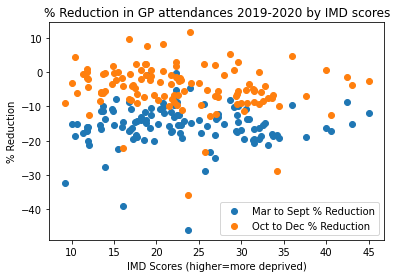

In [26]:
# Scatter plots of two y-axis 
import matplotlib.pyplot as plt

plt.scatter(CCG['IMD Scores'], CCG['% Change Mar Sep'])
plt.scatter(CCG['IMD Scores'], CCG['% Change Oct Dec'])
classes = ['Mar to Sept % Reduction', 'Oct to Dec % Reduction']
plt.ylabel('% Reduction')
plt.xlabel('IMD Scores (higher=more deprived)')
plt.title("% Reduction in GP attendances 2019-2020 by IMD scores")
plt.legend(labels=classes)
plt.show()

# plt.scatter(CCG['IMD Scores'], CCG['% Change Mar Sep'])
# plt.ylabel('% Reduction')
# plt.xlabel('IMD Scores')
# plt.show()
# CCG.plot.scatter(x='IMD Scores', y='% Change Mar Sep')

### Find correlations

In [27]:
CCG.corr()

,% Change Mar Sep,% Change Oct Dec,IMD Scores
% Change Mar Sep,1.000000,0.663739,0.035471
% Change Oct Dec,0.663739,1.000000,-0.164466
IMD Scores,0.035471,-0.164466,1.000000


### Have GP attendances dropped more in more deprived CCGs?

No strong correlations between GP attendance reduction & deprivation (IMD scores) as seen in both scatter plots and Pearson correlation coefficients.  Now let's move on to age...

## % change in GP attendances by percentage of patients over 65

### Read in age data and combine the datasets

In [28]:
# read in & assign % 65+ to each CCG so I can calculate % change by % 65+ 
age = pd.read_csv("Compare_areas_age.csv")
age.head()

,Indicator ID,Indicator Name,Parent Code,Parent Name,Area Code,AreaName,Area Type,Sex,Age,Category Type,Category,Time period,Value,Lower CI 95.0 limit,Upper CI 95.0 limit,Lower CI 99.8 limit,Upper CI 99.8 limit,Count,Denominator,Value note,Recent Trend,Compared to England value or percentiles,Compared to parent value or percentiles,Time period Sortable,New data,Compared to goal
0,336,% aged 65+ years,NaN,NaN,E92000001,England,England,Persons,65+ yrs,NaN,NaN,2020,17.515917,17.506337,17.525502,17.500813,17.531032,"10,586,109",60437080,"<span class=""tooltipValueNote"">* Aggregated fr...",Increasing,NaN,NaN,20200000,NaN,NaN
1,336,% aged 65+ years,E92000001,England,E38000087,NHS Isle Of Wight CCG,CCGs (since 4/20),Persons,65+ yrs,NaN,NaN,2020,28.307600,NaN,NaN,NaN,NaN,"41,027",144933,NaN,Increasing,Highest quintile,Highest quintile,20200000,NaN,NaN
2,336,% aged 65+ years,E92000001,England,E38000226,NHS Fylde & Wyre CCG,CCGs (since 4/20),Persons,65+ yrs,NaN,NaN,2020,27.293300,NaN,NaN,NaN,NaN,"48,944",179326,NaN,Increasing,Highest quintile,Highest quintile,20200000,NaN,NaN
3,336,% aged 65+ years,E92000001,England,E38000170,NHS Southport And Formby CCG,CCGs (since 4/20),Persons,65+ yrs,NaN,NaN,2020,26.107400,NaN,NaN,NaN,NaN,"32,806",125658,NaN,Increasing,Highest quintile,Highest quintile,20200000,NaN,NaN
4,336,% aged 65+ years,E92000001,England,E38000052,NHS East Riding Of Yorkshire CCG,CCGs (since 4/20),Persons,65+ yrs,NaN,NaN,2020,25.948600,NaN,NaN,NaN,NaN,"79,698",307138,NaN,Increasing,Highest quintile,Highest quintile,20200000,NaN,NaN


In [29]:
MarSep2019["% 65+ Quintiles"] = MarSep2019.CCG_ONS_CODE.map(age.set_index('Area Code')['Compared to England value or percentiles'])
MarSep2020["% 65+ Quintiles"] = MarSep2020.CCG_ONS_CODE.map(age.set_index('Area Code')['Compared to England value or percentiles'])
OctDec2019["% 65+ Quintiles"] = OctDec2019.CCG_ONS_CODE.map(age.set_index('Area Code')['Compared to England value or percentiles'])
OctDec2020["% 65+ Quintiles"] = OctDec2020.CCG_ONS_CODE.map(age.set_index('Area Code')['Compared to England value or percentiles'])
OctDec2020.head()

,CCG_CODE,CCG_ONS_CODE,CCG_NAME,STP_ONS_CODE,REGION_ONS_CODE,Appointment_Date,APPT_STATUS,HCP_TYPE,APPT_MODE,TIME_BETWEEN_BOOK_AND_APPT,COUNT_OF_APPOINTMENTS,IMD Quintiles,% 65+ Quintiles
0,00L,E38000130,NHS Northumberland CCG,E54000050,E40000009,02NOV2020,Unknown,Unknown,Unknown,15 to 21 Days,1,Middle quintile,Highest quintile
1,00L,E38000130,NHS Northumberland CCG,E54000050,E40000009,02NOV2020,Unknown,Other Practice staff,Face-to-Face,Same Day,5,Middle quintile,Highest quintile
2,00L,E38000130,NHS Northumberland CCG,E54000050,E40000009,02NOV2020,DNA,GP,Face-to-Face,Same Day,10,Middle quintile,Highest quintile
3,00L,E38000130,NHS Northumberland CCG,E54000050,E40000009,02NOV2020,Attended,GP,Telephone,More than 28 Days,8,Middle quintile,Highest quintile
4,00L,E38000130,NHS Northumberland CCG,E54000050,E40000009,02NOV2020,DNA,Other Practice staff,Telephone,Same Day,2,Middle quintile,Highest quintile


### Checking for missing age values

In [30]:
#Check if CCGs have missing %age 65+ values
print(MarSep2019.isnull().sum()) 
print(MarSep2020.isnull().sum()) 
print(OctDec2019.isnull().sum())
print(OctDec2020.isnull().sum())

CCG_CODE                      0
CCG_ONS_CODE                  0
CCG_NAME                      0
STP_ONS_CODE                  0
REGION_ONS_CODE               0
Appointment_Date              0
APPT_STATUS                   0
HCP_TYPE                      0
APPT_MODE                     0
TIME_BETWEEN_BOOK_AND_APPT    0
COUNT_OF_APPOINTMENTS         0
IMD Quintiles                 0
% 65+ Quintiles               0
dtype: int64
CCG_CODE                      0
CCG_ONS_CODE                  0
CCG_NAME                      0
STP_ONS_CODE                  0
REGION_ONS_CODE               0
Appointment_Date              0
APPT_STATUS                   0
HCP_TYPE                      0
APPT_MODE                     0
TIME_BETWEEN_BOOK_AND_APPT    0
COUNT_OF_APPOINTMENTS         0
IMD Quintiles                 0
% 65+ Quintiles               0
dtype: int64
CCG_CODE                      0
CCG_ONS_CODE                  0
CCG_NAME                      0
STP_ONS_CODE                  0
REGION_ONS_COD

### % change in GP attendances by age quintiles during March to September 2020 vs March to September 2019

In [31]:
# % change for Mar-Sep 2019 vs Mar-Sep 2020 by age quintiles
MarSep2019age = MarSep2019.groupby('% 65+ Quintiles')['COUNT_OF_APPOINTMENTS'].sum()
print(MarSep2019age)
MarSep2020age = MarSep2020.groupby('% 65+ Quintiles')['COUNT_OF_APPOINTMENTS'].sum()
print(MarSep2020age)
MarSepChangeAge = 100* ((MarSep2020age-MarSep2019age)/MarSep2019age)
print(MarSepChangeAge)

% 65+ Quintiles
2nd highest quintile    32244086
2nd lowest quintile     41735626
Highest quintile        40943473
Lowest quintile         32922018
Middle quintile         24202965
Name: COUNT_OF_APPOINTMENTS, dtype: int64
% 65+ Quintiles
2nd highest quintile    27847506
2nd lowest quintile     35462714
Highest quintile        34249151
Lowest quintile         28450748
Middle quintile         20346760
Name: COUNT_OF_APPOINTMENTS, dtype: int64
% 65+ Quintiles
2nd highest quintile   -13.635307
2nd lowest quintile    -15.030114
Highest quintile       -16.350157
Lowest quintile        -13.581397
Middle quintile        -15.932779
Name: COUNT_OF_APPOINTMENTS, dtype: float64


### Convert % change into a table and assign 5 to highest quintile

In [32]:
# Convert % Change into a dataframe by assigning 5 to highest quintile
MarSepChange_age = pd.DataFrame({"5": -16.4,"4": -13.6,"3": -15.9,"2": -15.0,"1": -13.6}, index=['% Reduction Mar-Sep'])

MarSepChange_age

,5,4,3,2,1
% Reduction Mar-Sep,-16.4,-13.6,-15.9,-15.0,-13.6


### % change in GP attendances by age quintile during Oct to Dec 2020 vs Oct to Dec 2019

In [33]:
# % change for Oct-Dec 2019 vs Oct-Dec 2020 by age quintiles (highest quintile = highest proportion aged 65+)
OctDec2019age = OctDec2019.groupby('% 65+ Quintiles')['COUNT_OF_APPOINTMENTS'].sum()
OctDec2020age = OctDec2020.groupby('% 65+ Quintiles')['COUNT_OF_APPOINTMENTS'].sum()
print(OctDec2019age)
print(OctDec2020age)
OctDecChangeAge = 100* ((OctDec2020age-OctDec2019age)/OctDec2019age)
print(OctDecChangeAge)

% 65+ Quintiles
2nd highest quintile    15200403
2nd lowest quintile     19514091
Highest quintile        19123123
Lowest quintile         15211596
Middle quintile         11338705
Name: COUNT_OF_APPOINTMENTS, dtype: int64
% 65+ Quintiles
2nd highest quintile    14826375
2nd lowest quintile     18520656
Highest quintile        17939627
Lowest quintile         15015232
Middle quintile         10731592
Name: COUNT_OF_APPOINTMENTS, dtype: int64
% 65+ Quintiles
2nd highest quintile   -2.460645
2nd lowest quintile    -5.090860
Highest quintile       -6.188822
Lowest quintile        -1.290884
Middle quintile        -5.354342
Name: COUNT_OF_APPOINTMENTS, dtype: float64


In [34]:
# Convert % Change into a dataframe by assigning 5 to highest quintile
OctDecChange_age = pd.DataFrame({"5": -6.2,"4": -2.5,"3": -5.4,"2": -5.1,"1": -1.3}, index=['% Reduction Oct-Dec'])

OctDecChange_age

,5,4,3,2,1
% Reduction Oct-Dec,-6.2,-2.5,-5.4,-5.1,-1.3


### Combined table of % change in GP attendances in 2020 compared to 2019 by age 65 quintiles (5 = greatest proportions)

In [35]:
ReductionGPattendancesAge = pd.concat([MarSepChange_age, OctDecChange_age])
ReductionGPattendancesAge

,5,4,3,2,1
% Reduction Mar-Sep,-16.4,-13.6,-15.9,-15.0,-13.6
% Reduction Oct-Dec,-6.2,-2.5,-5.4,-5.1,-1.3


### Plotting correlations between GP attendances and patients aged 65+

Scatter plot of % aged 65+ vs change in GP attendances

#### Data merge

In [36]:
#  add in % 65+ for each CCG (must done before exclusion for accuracy)
CCG["% 65+"] = CCG.CCG_ONS_CODE.map(age.set_index('Area Code')['Value'])
CCG.head()

,CCG_ONS_CODE,% Change Mar Sep,% Change Oct Dec,IMD Scores,% 65+
0,E38000004,-14.889947,-4.103851,32.768,8.3450
1,E38000006,-16.928843,-8.879786,29.933,18.8541
2,E38000007,-10.581223,-1.198378,19.329,17.7289
3,E38000008,-15.520335,-6.763801,22.588,21.4551
4,E38000010,-10.700605,-3.327124,14.721,17.3781


#### Plotting correlations between GP attendances and age 65+

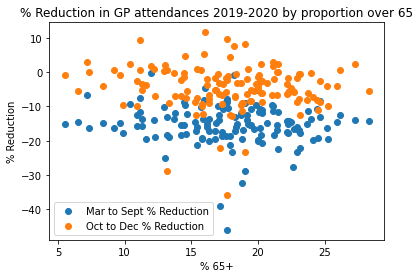

In [37]:
# Scatter plots of two y-axis 
import matplotlib.pyplot as plt

plt.scatter(CCG['% 65+'], CCG['% Change Mar Sep'])
plt.scatter(CCG['% 65+'], CCG['% Change Oct Dec'])
classes = ['Mar to Sept % Reduction', 'Oct to Dec % Reduction']
plt.ylabel('% Reduction')
plt.xlabel('% 65+')
plt.title("% Reduction in GP attendances 2019-2020 by proportion over 65")
plt.legend(labels=classes)
plt.show()

# plt.scatter(CCG['IMD Scores'], CCG['% Change Mar Sep'])
# plt.ylabel('% Reduction')
# plt.xlabel('IMD Scores')
# plt.show()
# CCG.plot.scatter(x='IMD Scores', y='% Change Mar Sep')

#### Find correlations

In [38]:
CCG.corr()

,% Change Mar Sep,% Change Oct Dec,IMD Scores,% 65+
% Change Mar Sep,1.000000,0.663739,0.035471,-0.083957
% Change Oct Dec,0.663739,1.000000,-0.164466,-0.094554
IMD Scores,0.035471,-0.164466,1.000000,-0.346317
% 65+,-0.083957,-0.094554,-0.346317,1.000000


#### Have GP attendances dropped by age groups over 65?

No strong correlations between GP attendance reduction & %age 65+ as seen in both scatter plots and Pearson correlation coefficients. Now let's move on to excluding urgent appointments.

## Excluding same or next day appointments (urgent issues)

### Deprivation & non-urgent GP attendance

#### Data munging

In [39]:
# Check the unique values for 'TIME_BETWEEN_BOOK_AND_APPT'
print(MarSep2019['TIME_BETWEEN_BOOK_AND_APPT'].value_counts())

Same Day                454759
2 to 7 Days             400659
8  to 14 Days           330356
1 Day                   323425
15  to 21 Days          274107
22  to 28 Days          247654
More than 28 Days       239224
Unknown / Data Issue     18139
Name: TIME_BETWEEN_BOOK_AND_APPT, dtype: int64


In [40]:
# Exclude same/next day appt by filtering them out
MarSep2019copy=MarSep2019.copy()
MarSep2019copy = MarSep2019copy[MarSep2019copy['TIME_BETWEEN_BOOK_AND_APPT'] != 'Same Day']
MarSep2019copy = MarSep2019copy[MarSep2019copy['TIME_BETWEEN_BOOK_AND_APPT'] != '1 Day']

MarSep2020copy=MarSep2020.copy()
MarSep2020copy = MarSep2020copy[MarSep2020copy['TIME_BETWEEN_BOOK_AND_APPT'] != 'Same Day']
MarSep2020copy = MarSep2020copy[MarSep2020copy['TIME_BETWEEN_BOOK_AND_APPT'] != '1 Day']


OctDec2019copy=OctDec2019.copy()
OctDec2019copy = OctDec2019copy[OctDec2019copy['TIME_BETWEEN_BOOK_AND_APPT'] != 'Same Day']
OctDec2019copy = OctDec2019copy[OctDec2019copy['TIME_BETWEEN_BOOK_AND_APPT'] != '1 Day']

OctDec2020copy=OctDec2020.copy()
OctDec2020copy = OctDec2020copy[OctDec2020copy['TIME_BETWEEN_BOOK_AND_APPT'] != 'Same Day']
OctDec2020copy = OctDec2020copy[OctDec2020copy['TIME_BETWEEN_BOOK_AND_APPT'] != '1 Day']
OctDec2020copy['TIME_BETWEEN_BOOK_AND_APPT'].value_counts()

2 to 7 Days             175133
8  to 14 Days           146868
15  to 21 Days          120339
22  to 28 Days          102538
More than 28 Days        94317
Unknown / Data Issue      8686
Name: TIME_BETWEEN_BOOK_AND_APPT, dtype: int64

In [41]:
# % change for Mar-Sep 2019 vs Mar-Sep 2020 by IMD quintiles
MarSep2019imd2 = MarSep2019copy.groupby('IMD Quintiles')['COUNT_OF_APPOINTMENTS'].sum()
print(MarSep2019imd2)
MarSep2020imd2 = MarSep2020copy.groupby('IMD Quintiles')['COUNT_OF_APPOINTMENTS'].sum()
print(MarSep2020imd2)
MarSepChange2 = 100* ((MarSep2020imd2-MarSep2019imd2)/MarSep2019imd2)
print(MarSepChange2)

IMD Quintiles
2nd highest quintile    11735455
2nd lowest quintile     11858351
Highest quintile        10824885
Lowest quintile         13654633
Middle quintile         13439010
Not compared            26905879
Name: COUNT_OF_APPOINTMENTS, dtype: int64
IMD Quintiles
2nd highest quintile     7218514
2nd lowest quintile      7389366
Highest quintile         6129342
Lowest quintile          8367887
Middle quintile          8788875
Not compared            17101315
Name: COUNT_OF_APPOINTMENTS, dtype: int64
IMD Quintiles
2nd highest quintile   -38.489696
2nd lowest quintile    -37.686395
Highest quintile       -43.377301
Lowest quintile        -38.717599
Middle quintile        -34.601768
Not compared           -36.440229
Name: COUNT_OF_APPOINTMENTS, dtype: float64


In [42]:
# Convert % Change into a dataframe by assigning 5 to highest quintile
MarSepChange_df1 = pd.DataFrame({"5": -43.3,"4": -38.4,"3": -34.6,"2": -37.6,"1": -38.7}, index=['% Mar Sep Change'])

MarSepChange_df1

,5,4,3,2,1
% Mar Sep Change,-43.3,-38.4,-34.6,-37.6,-38.7


In [43]:
# % change for Oct-Dec 2019 vs Oct-Dec 2020 by IMD quintiles 
OctDec2019imd2 = OctDec2019copy.groupby('IMD Quintiles')['COUNT_OF_APPOINTMENTS'].sum()
OctDec2020imd2 = OctDec2020copy.groupby('IMD Quintiles')['COUNT_OF_APPOINTMENTS'].sum()
print(OctDec2019imd2)
print(OctDec2020imd2)
OctDecChange2 = 100* ((OctDec2020imd2-OctDec2019imd2)/OctDec2019imd2)
print(OctDecChange2)

IMD Quintiles
2nd highest quintile     5526981
2nd lowest quintile      5697668
Highest quintile         5020104
Lowest quintile          6533753
Middle quintile          6370682
Not compared            12816209
Name: COUNT_OF_APPOINTMENTS, dtype: int64
IMD Quintiles
2nd highest quintile     4615906
2nd lowest quintile      4990942
Highest quintile         4058262
Lowest quintile          5765157
Middle quintile          5532969
Not compared            11262106
Name: COUNT_OF_APPOINTMENTS, dtype: int64
IMD Quintiles
2nd highest quintile   -16.484135
2nd lowest quintile    -12.403776
Highest quintile       -19.159802
Lowest quintile        -11.763469
Middle quintile        -13.149503
Not compared           -12.126074
Name: COUNT_OF_APPOINTMENTS, dtype: float64


In [44]:
# Convert % Change into a dataframe by assigning 5 to highest quintile
OctDecChange_df1 = pd.DataFrame({"5": -19.1,"4": -16.4,"3": -13.1,"2": -12.4,"1": -11.7}, index=['% Oct Dec Change'])

OctDecChange_df1

,5,4,3,2,1
% Oct Dec Change,-19.1,-16.4,-13.1,-12.4,-11.7


In [45]:
ReductionGPattendancesIMD = pd.concat([MarSepChange_df1, OctDecChange_df1])
ReductionGPattendancesIMD

,5,4,3,2,1
% Mar Sep Change,-43.3,-38.4,-34.6,-37.6,-38.7
% Oct Dec Change,-19.1,-16.4,-13.1,-12.4,-11.7


### % change in GP attendances by deprivation, excluding same/next day appointments  
Please note highest quintiles are the most deprived ones. 
* All quintiles faced a reduction in GP attendances during 2020 compared to 2019, with the reduction in GP attendances much greater for most deprived. 
* For Oct to Dec 2020 vs Oct to Dec 2019, there's a linear trend and the % reduction in GP attendances is greater for more deprived compared to less deprived
* For Mar to Sep 2019 vs 2020, it doesn't look like there is a linear trend between quintiles for % reduction in GP attendances. However, most deprived (highest quintile) have greater reduction than the least deprived. Interestingly, middle quintile has the smallest reduction 


### Plotting correlations between GP attendances and deprivation level, excluding same/next day appointments
#### Data munging

In [46]:
# % change for Mar-Sep 2019 vs Mar-Sep 2020 by CCG excluding urgent appts
MarSep2019CCG = MarSep2019copy.groupby('CCG_ONS_CODE')['COUNT_OF_APPOINTMENTS'].sum()

MarSep2020CCG = MarSep2020copy.groupby('CCG_ONS_CODE')['COUNT_OF_APPOINTMENTS'].sum()


MarSepCCGChange = 100* ((MarSep2020CCG-MarSep2019CCG)/MarSep2019CCG)

# % change for Oct-Dec 2019 vs Oct-Dec 2020 by CCG 
OctDec2019CCG = OctDec2019copy.groupby('CCG_ONS_CODE')['COUNT_OF_APPOINTMENTS'].sum()
OctDec2020CCG = OctDec2020copy.groupby('CCG_ONS_CODE')['COUNT_OF_APPOINTMENTS'].sum()
OctDecCCGChange = 100* ((OctDec2020CCG-OctDec2019CCG)/OctDec2019CCG)

In [47]:
# Convert both CCG Change into a table dataframe
MSccg = pd.DataFrame(MarSepCCGChange)
ODccg = pd.DataFrame(OctDecCCGChange)
#rename Count of Appt column to % reduction Mar Sept
MSccg.rename(columns={'COUNT_OF_APPOINTMENTS': '% Change Mar Sep'}, inplace=True)
ODccg.rename(columns={'COUNT_OF_APPOINTMENTS': '% Change Oct Dec'}, inplace=True)
# merge the two tables
CCG = pd.merge(left=MSccg, right=ODccg, on='CCG_ONS_CODE') 
# reset index
CCG = CCG.reset_index()

#  add in IMD scores for each CCG
CCG["IMD Scores"] = CCG.CCG_ONS_CODE.map(deprivation.set_index('Area Code')['Value'])

CCG.head()

,CCG_ONS_CODE,% Change Mar Sep,% Change Oct Dec,IMD Scores
0,E38000004,-45.316645,-13.041554,32.768
1,E38000006,-36.692268,-14.173168,29.933
2,E38000007,-37.000552,-14.529194,19.329
3,E38000008,-25.694033,2.817690,22.588
4,E38000010,-33.382859,-12.386624,14.721


#### Plotting correlations between GP attendances and deprivation, excluding urgent appointments

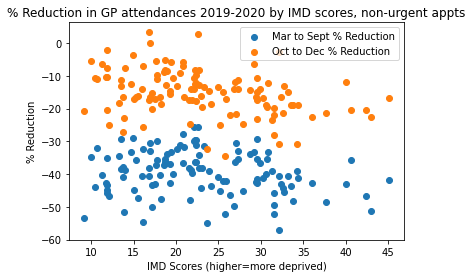

In [48]:
# Scatter plots of two y-axis 
import matplotlib.pyplot as plt

plt.scatter(CCG['IMD Scores'], CCG['% Change Mar Sep'])
plt.scatter(CCG['IMD Scores'], CCG['% Change Oct Dec'])
classes = ['Mar to Sept % Reduction', 'Oct to Dec % Reduction']
plt.ylabel('% Reduction')
plt.xlabel('IMD Scores (higher=more deprived)')
plt.title("% Reduction in GP attendances 2019-2020 by IMD scores, non-urgent appts")
plt.legend(labels=classes)
plt.show()

#### Find correlations

In [49]:
CCG.corr()

,% Change Mar Sep,% Change Oct Dec,IMD Scores
% Change Mar Sep,1.000000,0.613092,-0.181813
% Change Oct Dec,0.613092,1.000000,-0.341696
IMD Scores,-0.181813,-0.341696,1.000000


#### Have GP attendances dropped more in more deprived CCGs, excluding urgent appointments?

Excluding urgent appointments, there are still no strong correlations between GP attendance reduction & deprivation (IMD scores) as seen in both scatter plots and Pearson correlation coefficients. There seems to be a stronger correlation, albeit a weak one for deprivation and GP attendances in the Oct-Dec period.

### Aged 65+ & non-urgent GP attendance
#### Data munging

In [50]:
# % change for Mar-Sep 2019 vs Mar-Sep 2020 by % 65+
MarSep2019imd2 = MarSep2019copy.groupby('% 65+ Quintiles')['COUNT_OF_APPOINTMENTS'].sum()
print(MarSep2019imd2)
MarSep2020imd2 = MarSep2020copy.groupby('% 65+ Quintiles')['COUNT_OF_APPOINTMENTS'].sum()
print(MarSep2020imd2)
MarSepChange2 = 100* ((MarSep2020imd2-MarSep2019imd2)/MarSep2019imd2)
print(MarSepChange2)

% 65+ Quintiles
2nd highest quintile    17167648
2nd lowest quintile     21118275
Highest quintile        21366507
Lowest quintile         16191888
Middle quintile         12573895
Name: COUNT_OF_APPOINTMENTS, dtype: int64
% 65+ Quintiles
2nd highest quintile    11012856
2nd lowest quintile     13013953
Highest quintile        13828429
Lowest quintile          9455487
Middle quintile          7684574
Name: COUNT_OF_APPOINTMENTS, dtype: int64
% 65+ Quintiles
2nd highest quintile   -35.851108
2nd lowest quintile    -38.375871
Highest quintile       -35.279880
Lowest quintile        -41.603555
Middle quintile        -38.884697
Name: COUNT_OF_APPOINTMENTS, dtype: float64


In [51]:
# % change for Oct-Dec 2019 vs Oct-Dec 2020 by % 65 quintiles 
OctDec2019imd2 = OctDec2019copy.groupby('% 65+ Quintiles')['COUNT_OF_APPOINTMENTS'].sum()
OctDec2020imd2 = OctDec2020copy.groupby('% 65+ Quintiles')['COUNT_OF_APPOINTMENTS'].sum()
print(OctDec2019imd2)
print(OctDec2020imd2)
OctDecChange2 = 100* ((OctDec2020imd2-OctDec2019imd2)/OctDec2019imd2)
print(OctDecChange2)

% 65+ Quintiles
2nd highest quintile     8229877
2nd lowest quintile     10040527
Highest quintile        10244569
Lowest quintile          7481256
Middle quintile          5969168
Name: COUNT_OF_APPOINTMENTS, dtype: int64
% 65+ Quintiles
2nd highest quintile    7260937
2nd lowest quintile     8513672
Highest quintile        8893564
Lowest quintile         6421938
Middle quintile         5135231
Name: COUNT_OF_APPOINTMENTS, dtype: int64
% 65+ Quintiles
2nd highest quintile   -11.773444
2nd lowest quintile    -15.206921
Highest quintile       -13.187524
Lowest quintile        -14.159628
Middle quintile        -13.970741
Name: COUNT_OF_APPOINTMENTS, dtype: float64


In [52]:
# Convert % Change into a dataframe by assigning 5 to highest quintile
MarSepChange_df2 = pd.DataFrame({"5": -35.3,"4": -35.6,"3": -38.9,"2": -38.4,"1": -41.6}, index=['% Mar Sep Change'])

# Convert % Change into a dataframe by assigning 5 to highest quintile
OctDecChange_df2 = pd.DataFrame({"5": -13.2,"4": -11.8,"3": -14.0,"2": -15.2,"1": -14.2}, index=['% Oct Dec Change'])

ReductionGPattendancesAge = pd.concat([MarSepChange_df2, OctDecChange_df2])
ReductionGPattendancesAge

,5,4,3,2,1
% Mar Sep Change,-35.3,-35.6,-38.9,-38.4,-41.6
% Oct Dec Change,-13.2,-11.8,-14.0,-15.2,-14.2


### % change in GP attendances by age 65+, excluding same/next day appointments
Please note highest quintiles = highest proportion of 65+. 
* All quintiles faced a reduction in GP attendances during 2020 compared to 2019
* For Oct to Dec 2020 vs Oct to Dec 2019, there's no clear trend in % change in GP attendance by age quintiles.
* For Mar to Sep 2019 vs 2020, % reduction in GP attendances is greater in CCGs with smaller proportion of age 65+. 

### Plotting correlations between GP attendances and age 65+, excluding same/next day appointments
#### Data munging

In [53]:
# #  add in % 65+ for each CCG
CCG["% 65+"] = CCG.CCG_ONS_CODE.map(age.set_index('Area Code')['Value'])

CCG.head()

,CCG_ONS_CODE,% Change Mar Sep,% Change Oct Dec,IMD Scores,% 65+
0,E38000004,-45.316645,-13.041554,32.768,8.3450
1,E38000006,-36.692268,-14.173168,29.933,18.8541
2,E38000007,-37.000552,-14.529194,19.329,17.7289
3,E38000008,-25.694033,2.817690,22.588,21.4551
4,E38000010,-33.382859,-12.386624,14.721,17.3781


### Plotting correlations between GP attendances and % 65+, excluding urgent appointments

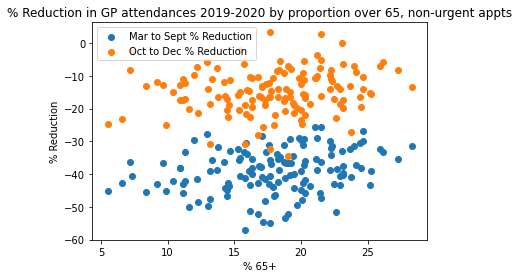

In [54]:
# Scatter plots of two y-axis 
import matplotlib.pyplot as plt

plt.scatter(CCG['% 65+'], CCG['% Change Mar Sep'])
plt.scatter(CCG['% 65+'], CCG['% Change Oct Dec'])
classes = ['Mar to Sept % Reduction', 'Oct to Dec % Reduction']
plt.ylabel('% Reduction')
plt.xlabel('% 65+')
plt.title("% Reduction in GP attendances 2019-2020 by proportion over 65, non-urgent appts")
plt.legend(labels=classes)
plt.show()

#### Find correlations

In [55]:
CCG.corr()

,% Change Mar Sep,% Change Oct Dec,IMD Scores,% 65+
% Change Mar Sep,1.000000,0.613092,-0.181813,0.255762
% Change Oct Dec,0.613092,1.000000,-0.341696,0.144187
IMD Scores,-0.181813,-0.341696,1.000000,-0.346317
% 65+,0.255762,0.144187,-0.346317,1.000000


### Have GP attendances dropped by age groups over 65, excluding urgent appointments?
Per the scatter plot and Pearson's correlation coefficients, there seems to be a low correlation between age 65+ and reduction in GP attendances in Mar-Sep where CCGs with greater % of 65+ saw less reduction. 